In [31]:
import numpy as np
from IPython.display import Image,display
import matplotlib.pyplot as plt

In [32]:
#OR data
OR_data=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
X=OR_data[:,0:2]
y=OR_data[:,-1]

In [33]:
#Function to show the ntwork values
def draw_ann_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

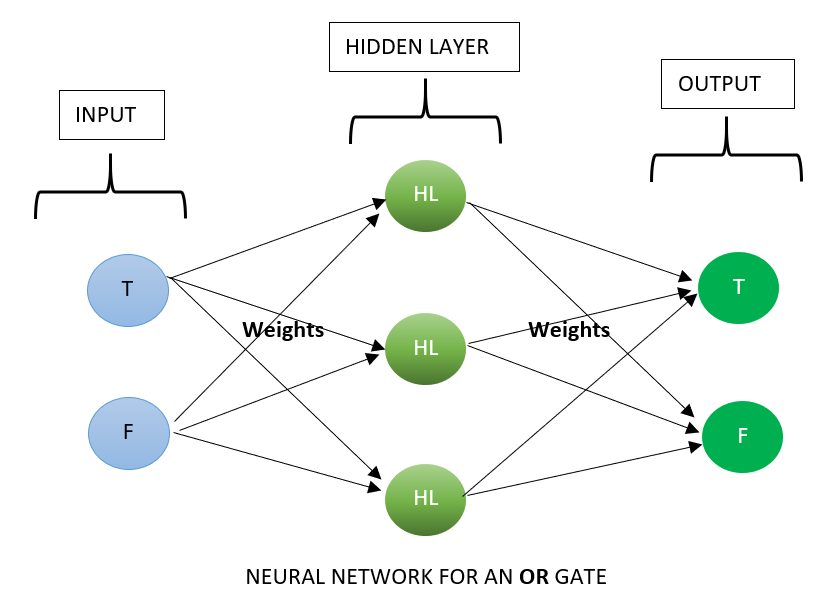

In [34]:
#Image representation of the ANN
display(Image("ann.png"))


In [35]:
#Initializing weight values
def initialize_network():
    
    input_neurons=len(X[0])
    hidden_neurons=input_neurons+1
    output_neurons=2
    
    n_hidden_layers=1
    
    net=list()
    
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons=len(net[-1])
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        net.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

In [36]:
net=initialize_network()
draw_ann_network(net)

Layer 1 
neuron 1 : {'weights': array([ 0.25903679,  0.50154826])}
neuron 2 : {'weights': array([ 0.44300138,  0.14794507])}
neuron 3 : {'weights': array([ 0.88515863,  0.83277022])}
Layer 2 
neuron 1 : {'weights': array([ 0.90061212,  0.92151932,  0.20023779])}
neuron 2 : {'weights': array([ 0.04866959,  0.16779282,  0.51970953])}


In [37]:
def sigmoid_function(sum):
    return (1/(1+np.exp(-sum)))

In [38]:
def forward_propagation(net,input):
    row=input
    for layer in net:
        prev_input=np.array([])
        for neuron in layer:
            sum=neuron['weights'].T.dot(row)
            
            result=sigmoid_function(sum)
            neuron['result']=result
            
            prev_input=np.append(prev_input,[result])
        row =prev_input
    
    return row

In [39]:
def sigmoidDerivative(output):
    return output*(1.0-output)

In [40]:
def back_propagation(net,row,expected):
     for i in reversed(range(len(net))):
            layer=net[i]
            errors=np.array([])
            if i==len(net)-1:
                results=[neuron['result'] for neuron in layer]
                errors = expected-np.array(results) 
            else:
                for j in range(len(layer)):
                    herror=0
                    nextlayer=net[i+1]
                    for neuron in nextlayer:
                        herror+=(neuron['weights'][j]*neuron['delta'])
                    errors=np.append(errors,[herror])
            
            for j in range(len(layer)):
                neuron=layer[j]
                neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])

In [41]:
def weights_update(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]

In [42]:
#Training function
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(X):
            outputs=forward_propagation(net,row)
            
            expected=[0.0 for i in range(n_outputs)]
            expected[y[i]]=1
    
            sum_error+=sum([(expected[j]-outputs[j])**2 for j in range(len(expected))])
            back_propagation(net,row,expected)
            weights_update(net,row,0.05)
        if epoch%10000 ==0:
            print('>epoch=%d,error=%.3f'%(epoch,sum_error))
            errors.append(sum_error)
    return errors

In [48]:
errors=training(net,100000, 0.05,2)

>epoch=0,error=2.654
>epoch=10000,error=0.018
>epoch=20000,error=0.007
>epoch=30000,error=0.004
>epoch=40000,error=0.003
>epoch=50000,error=0.003
>epoch=60000,error=0.002
>epoch=70000,error=0.002
>epoch=80000,error=0.002
>epoch=90000,error=0.001


In [49]:
#Function to do Prediction
def predict(network, row):
    outputs = forward_propagation(net, row)
    return outputs

In [50]:
#Network With weight values
draw_ann_network(net)

Layer 1 
neuron 1 : {'weights': array([-3.18880214, -3.15180618]), 'result': 0.0017601259378330191, 'delta': -8.0031708802148344e-07}
neuron 2 : {'weights': array([-3.47273524, -3.51733392]), 'result': 0.00092013545614933335, 'delta': -4.9599546260498687e-07}
neuron 3 : {'weights': array([ 3.70714368,  3.70194721]), 'result': 0.99939464555232016, 'delta': 2.3490051190891264e-07}
Layer 2 
neuron 1 : {'weights': array([ 5.95771336,  7.11115693, -5.09939742]), 'result': 0.006185891601649114, 'delta': -3.802855018838668e-05}
neuron 2 : {'weights': array([-6.00533528, -7.05944197,  5.0982026 ]), 'result': 0.99380654016575198, 'delta': 3.8121370135045643e-05}


In [56]:
#Main Function
if __name__ =='__main__':     
    
    first_truth_value = input("Please enter first_truth_value: ")
    second_truth_value = input("Please enter second_truth_value: ")
    
    pred=predict(net,np.array([int(first_truth_value), int(second_truth_value)]))
    output=np.argmax(pred)
    print("The output is ",output)

Please enter first_truth_value: 1
Please enter second_truth_value: 1
The output is  1
